(150, 5)


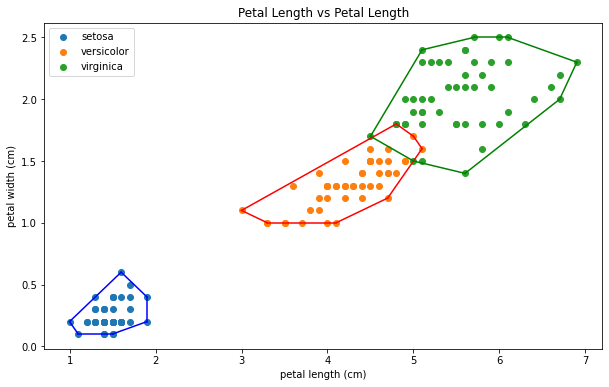

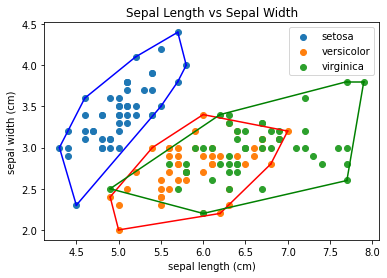

In [15]:
# Demonstrasi menggunakan hasil implementasi sendiri, modul bryanhull class ConvexHull
# Untuk Bonus menerima sebarang dataset ada di cell terakhir
# Bryan Amirul Husna / 13520146 / K02
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
data = datasets.load_iris()
#create a DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = pd.DataFrame(data.target)
print(df.shape)
df.head()

# Visualisasi hasil ConvexHull
import matplotlib.pyplot as plt
from bryanhull import ConvexHull
plt.figure(figsize = (10, 6))
colors = ['b','r','g']

# Petal Length vs Petal Width
plt.title('Petal Length vs Petal Length')
plt.xlabel(data.feature_names[2])
plt.ylabel(data.feature_names[3])
for i in range(len(data.target_names)):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[2,3]].values
    bucketlst = bucket.tolist()     # Dari numpy array perlu diubah ke Python List karena implementasi sendiri menggunakan List Python
    hull = ConvexHull(bucketlst)    # Pemanggilan kalkulasi ConvexHull
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
    for simplex in hull.simplices:
        plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])
        plt.legend()
plt.show()

# Sepal Length vs Sepal Width
plt.title('Sepal Length vs Sepal Width')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
for i in range(len(data.target_names)):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[0,1]].values

    bucketlst = bucket.tolist()     # Dari numpy array perlu diubah ke Python List karena implementasi sendiri menggunakan List Python
    hull = ConvexHull(bucketlst)    # Pemanggilan kalkulasi ConvexHull
    
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
    for simplex in hull.simplices:
        plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])
        plt.legend()
plt.show()

(150, 5)


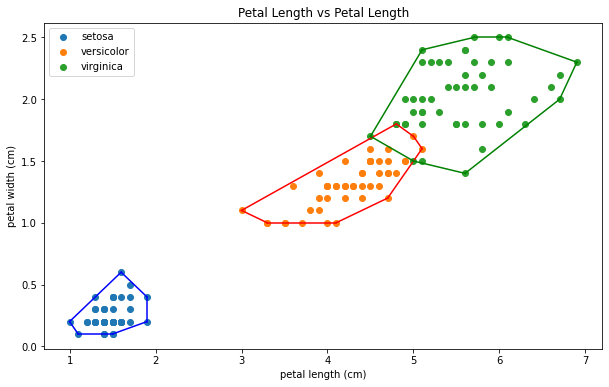

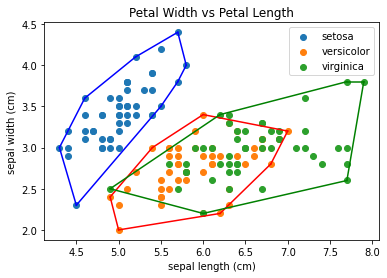

In [16]:
# Hasil menggunakan library ConvexHull scipy.spatial
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
data = datasets.load_iris()
#create a DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = pd.DataFrame(data.target)
print(df.shape)

#visualisasi hasil ConvexHull
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
plt.figure(figsize = (10, 6))
colors = ['b','r','g']

# Petal Length vs Petal Width
plt.title('Petal Length vs Petal Length')
plt.xlabel(data.feature_names[2])
plt.ylabel(data.feature_names[3])
for i in range(len(data.target_names)):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[2,3]].values
    hull = ConvexHull(bucket)
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
    for simplex in hull.simplices:
        plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])
        plt.legend()
plt.show()

# Sepal Length vs Sepal Width
plt.title('Petal Width vs Petal Length')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
for i in range(len(data.target_names)):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[0,1]].values
    hull = ConvexHull(bucket) #bagian ini diganti dengan hasil implementasi ConvexHull Divide & Conquer
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
    for simplex in hull.simplices:
        plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])
        plt.legend()
plt.show()

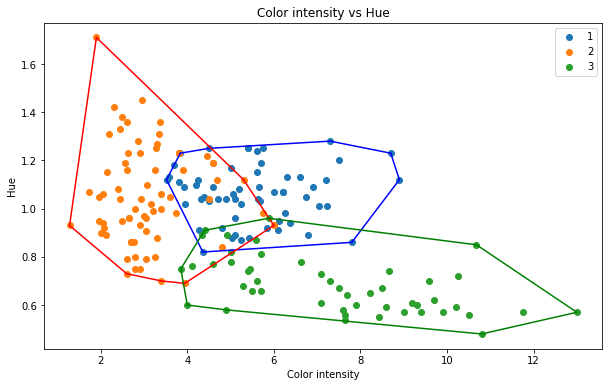

In [36]:
# BONUS: Menerima data sebarang
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Pastikan data .csv memiliki header
# Pada hasil contoh di bawah, inputannya berurutan (tanpa tanda petik) "wine.csv", "10", "11", "0"
datasrc = input("Masukkan nama file .csv dataset (bukan path), file harus berada di folder test")
data = pd.read_csv("../test/" + datasrc)
xidx = int(input("Indeks kolom sumbu-x: "))

yidx = int(input("Indeks kolom sumbu-y: "))
targetidx = int(input("Indeks kolom target/jenis/kelompok/klasifikasi: "))

# Visualisasi hasil ConvexHull
import matplotlib.pyplot as plt
from bryanhull import ConvexHull
plt.figure(figsize = (10, 6))
colors = ['b','r','g','c','m','y','slategrey','purple','pink']  # Daftar warna, maksimum ada 9 kelas target

plt.title(data.columns[xidx] + " vs " + data.columns[yidx])
plt.xlabel(data.columns[xidx])
plt.ylabel(data.columns[yidx])
data["target"] = data.iloc[:, targetidx]
target_names = data.target.unique()
for i in range(len(target_names)):
    bucket = data.loc[data["target"] == target_names[i]]
    bucket = bucket.iloc[:,[xidx,yidx]].values
    bucketlst = bucket.tolist()     # Dari numpy array perlu diubah ke Python List karena implementasi sendiri menggunakan List Python
    hull = ConvexHull(bucketlst)    # Pemanggilan kalkulasi ConvexHull
    plt.scatter(bucket[:, 0], bucket[:, 1], label=target_names[i])
    for simplex in hull.simplices:
        plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])
        plt.legend()
plt.show()